# Predicción de la deserción


Una empresa que vende un producto X y tiene una lista de los clientes que han usado la plataforma para realizar una compra de dicho producto. Algunos de sus clientes desertan de la plataforma de compras y es de interés para la empresa ser capaz de predecir la deserción de clientes de la manera más precisa posible con el fin de implementar estrategias de marketing para afianzar a dichos clientes. 
El dataset cuenta con 10000 registros y cada uno contiene 11 columnas que serán utilizadas para el análisis de datos. Estas columnas son:

- Score: puntaje del cliente dentro de la plataforma de ventas
- Nationality: nacionalidad del cliente (Alemania, Francia y España)
- Gender: género (femenino y masculino)
- Age: edad del cliente
- Tenure: permanencia del cliente en la plataforma cuantificado en un número entre el 1 y el 10
- Balance: balance bancario del cliente
- Products: cantidad de productos comprados por el cliente
- Card: variable verdadera o falsa que define si el cliente posee tarjeta de crédito
- Active: variable verdadera o falsa que define si el cliente figura como activo dentro de la plataforma
- Salary: salario del cliente
- Exited: variable target que muestra si el cliente se ha dado de baja de la plataforma 


Nuestro objetivo final es estimar qué clientes son más propensos a desertar del sitio con el fin de poder tomar medidas de retencián sobre ellos. 


Equipo:
> - Roberth Hernandez
> - Rodrigo Gomez Portillo

## Dataset

Link al dataset: https://www.kaggle.com/code/hieunt01/churn-predictions-using-logistic-regression



# Importaciones

In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix



import warnings
warnings.filterwarnings("ignore")

mpl.style.use('bmh')

In [47]:
def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.pie(sizes, explode=explode, labels=labels, shadow=True, colors = ['Red','Yellow'],
           autopct='%1.1f%%')
    ax.axis('equal')

In [48]:
#LECTURA DE LA DATA
df = pd.read_csv("Data\Churn Prediction.csv",delimiter = ";",index_col=0)
df.drop('Surname', inplace = True, axis = 1)
df.drop('Id', inplace = True, axis = 1)
df['score_by_products'] = df['Score'] / df['Products']


Se eliminaron las variables Surname y Id ya que no hay razón para analizarlas.

También se creó una varible nueva que nace de la division entre el score del cliente y la cantidad de productos comprados.

In [49]:
#CONSTRUCCION DEL DATAFRAME
data = pd.DataFrame(df)
data.head()

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,score_by_products
Row,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,619.000000
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,608.000000
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,167.333333
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,349.500000
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,850.000000


In [50]:
#VEMOS LA INFORMACION DEL DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Score              10000 non-null  int64  
 1   Nationality        10000 non-null  object 
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   Products           10000 non-null  int64  
 7   Card               10000 non-null  int64  
 8   Active             10000 non-null  int64  
 9   Salary             10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  score_by_products  10000 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 1015.6+ KB


In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
Card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
Active,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
score_by_products,10000.0,486.417308,183.636877,94.00,323.00,443.000,653.0000,850.00


In [52]:
#VEMOS LAS COLUMNAS QUE FORMAN PARTE DEL DATAFRAME
data.columns

Index(['Score', 'Nationality', 'Gender', 'Age', 'Tenure', 'Balance',
       'Products', 'Card', 'Active', 'Salary', 'Exited', 'score_by_products'],
      dtype='object')

# Analisis univariado

En el análisis univariado pudimos concluir que: 
- Los clientes franceses representan más del 50% del dataset.
- No hay una diferencia impotante entre la cantidad de mujeres y hombres
- Donde score ~ 600 parece que hay más compras de productos
- El 50% de los usuarios se encuentran entre los 32 y 44 años
- El conjunto de datos tiene un gran desbalance respecto de la variable target con una relación 4 a 1



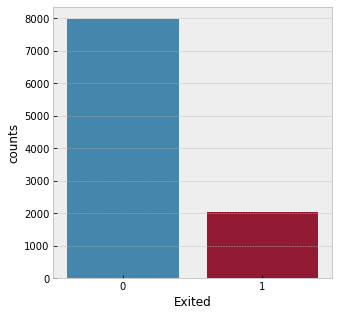

In [53]:
data_active_group= data.groupby(['Exited']).size().reset_index(name='counts')
plt.rcParams['figure.figsize'] = (5, 5)

sns.barplot( x='Exited',y="counts",data=data_active_group);


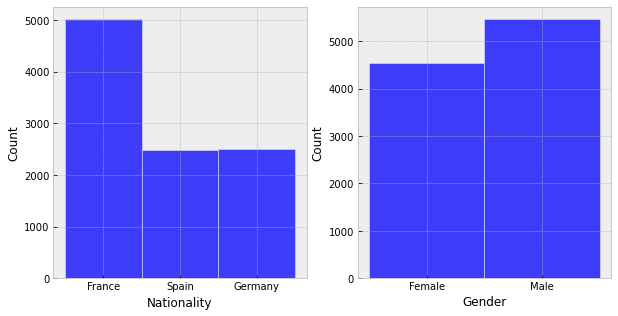

In [54]:
#CREAMOS UN GRAFICO DE BARRAS PARA LA VARIABLE NACIONALIDAD Y GENERO A CONTINUACION
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(ax=axes[0],data=data, x="Nationality");
sns.histplot(ax=axes[1],data=data, x="Gender");

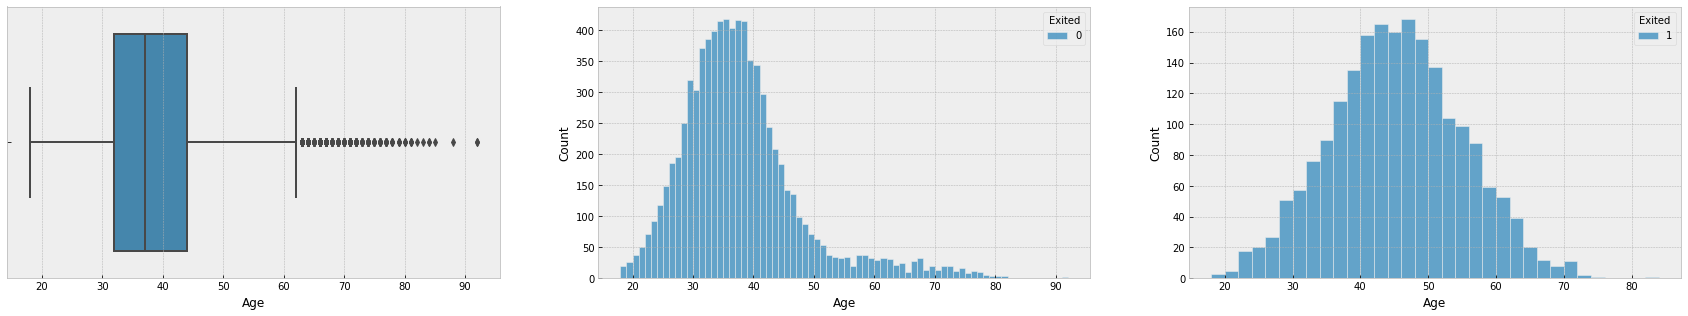

In [55]:
#SE CREA UN GRAFICO DE LINEAS DE LA VARIABLE EDAD
fig, axes = plt.subplots(1, 3, figsize=(30, 5))

sns.boxplot(ax=axes[0],x='Age', data=data)
sns.histplot(ax=axes[1],data=data.loc[data['Exited'] == 0], x="Age", hue="Exited", multiple="stack");
sns.histplot(ax=axes[2],data=data.loc[data['Exited'] == 1], x="Age", hue="Exited", multiple="stack");

In [56]:
filtro_por_exited = data[data['Products']>=3] 
filtro_por_exited.describe().T
filtro_por_exited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 3 to 9896
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Score              326 non-null    int64  
 1   Nationality        326 non-null    object 
 2   Gender             326 non-null    object 
 3   Age                326 non-null    int64  
 4   Tenure             326 non-null    int64  
 5   Balance            326 non-null    float64
 6   Products           326 non-null    int64  
 7   Card               326 non-null    int64  
 8   Active             326 non-null    int64  
 9   Salary             326 non-null    float64
 10  Exited             326 non-null    int64  
 11  score_by_products  326 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 33.1+ KB


<AxesSubplot:xlabel='Score'>

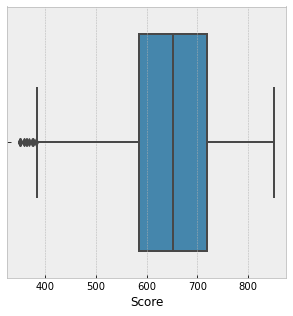

In [57]:
#SE CREA UN HISTOGRAMA PARA LA VARIABLE SCORE
sns.boxplot(x='Score', data=data)

# Análisis de componentes principales

Gracias al análisis de componentes principales es posible decir que:
- Con 4 componentes principales se describe el 90 % de la variabilidad del set de datos.
- Con 3 componentes principales se describe el 70 % de la variabilidad del set de datos.
- Las gráficas de las proyecciones de los datos en la dirección de las componentes principales no muestran una dependencia lineal entre ellas. 

In [58]:
scale = StandardScaler()
scaled_data = scale.fit_transform(data.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1))

In [59]:
pd.DataFrame(
    data    = scaled_data, 
    columns = data.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).columns, 
    index   = data.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).index
).describe()

,Score,Age,Balance,Salary,score_by_products
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.870326e-16,2.484679e-16,-5.978551e-17,-1.580958e-17,-2.451817e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109504e+00,-1.994969e+00,-1.225848e+00,-1.740268e+00,-2.137027e+00
25%,-6.883586e-01,-6.600185e-01,-1.225848e+00,-8.535935e-01,-8.899382e-01
50%,1.522218e-02,-1.832505e-01,3.319639e-01,1.802807e-03,-2.364420e-01
75%,6.981094e-01,4.842246e-01,8.199205e-01,8.572431e-01,9.071763e-01
max,2.063884e+00,5.061197e+00,2.795323e+00,1.737200e+00,1.979999e+00


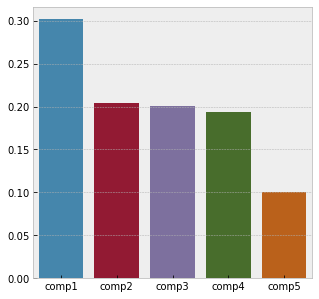

In [60]:
pca = PCA(n_components=5)
pca = pca.fit(scaled_data)
pd.DataFrame(
    data    = pca.components_, 
    columns = data.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).columns, 
    index   = ['PC1', 'PC2', 'PC3','PC4','PC5']
)
sns.barplot(x=['comp1','comp2','comp3','comp4','comp5'],y=pca.explained_variance_ratio_);

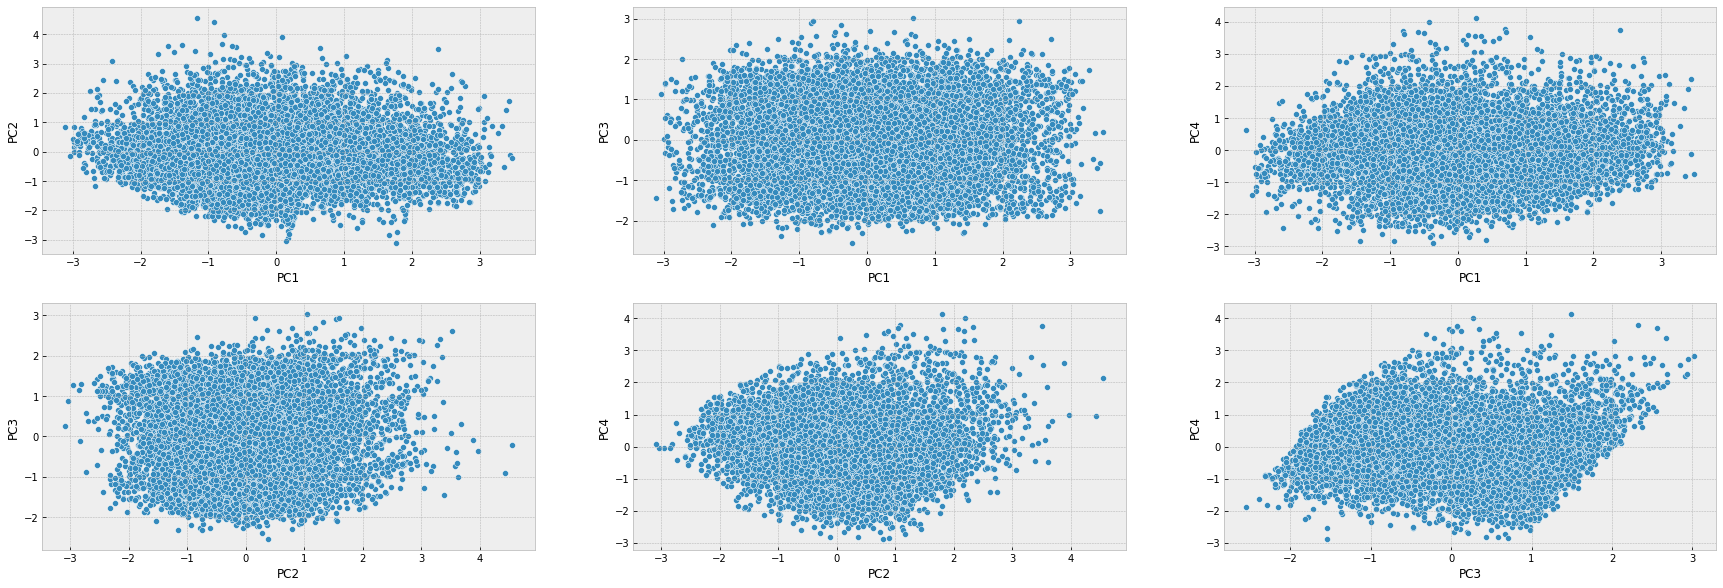

In [61]:
proyecciones = pca.transform(scaled_data)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    index   = data.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).index
)

fig, axes = plt.subplots(2, 3, figsize=(30, 10))

sns.scatterplot(ax=axes[0,0],data=proyecciones, x="PC1", y="PC2");
sns.scatterplot(ax=axes[0,1],data=proyecciones, x="PC1", y="PC3");
sns.scatterplot(ax=axes[0,2],data=proyecciones, x="PC1", y="PC4");
sns.scatterplot(ax=axes[1,0],data=proyecciones, x="PC2", y="PC3");
sns.scatterplot(ax=axes[1,1],data=proyecciones, x="PC2", y="PC4");
sns.scatterplot(ax=axes[1,2],data=proyecciones, x="PC3", y="PC4");

# Analisis Multivariado

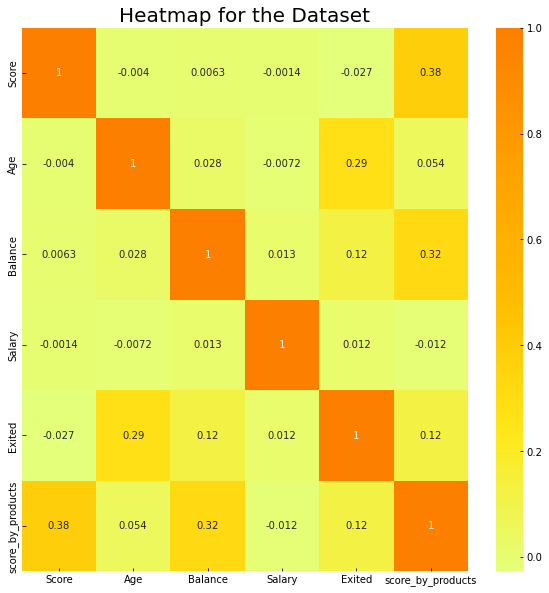

In [62]:
corr = data.drop(labels = ['Products','Card','Active','Tenure'] ,axis = 1).corr()
plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()
# A partir de este grafico puedo deducir que la correlacion mas fuerte que existe
# esta entre 'Age' y 'Exited'

En la matriz de correlación se oberva que Age y Salary tienen correlacion negativa, por lo que a medida que la edad aumenta el salario disminuye. Sin embargo, la correlación entre ambas es bastante baja lo que no permite ser concluyente al respecto de dicha relación


## Grafica de relaciones entre variables

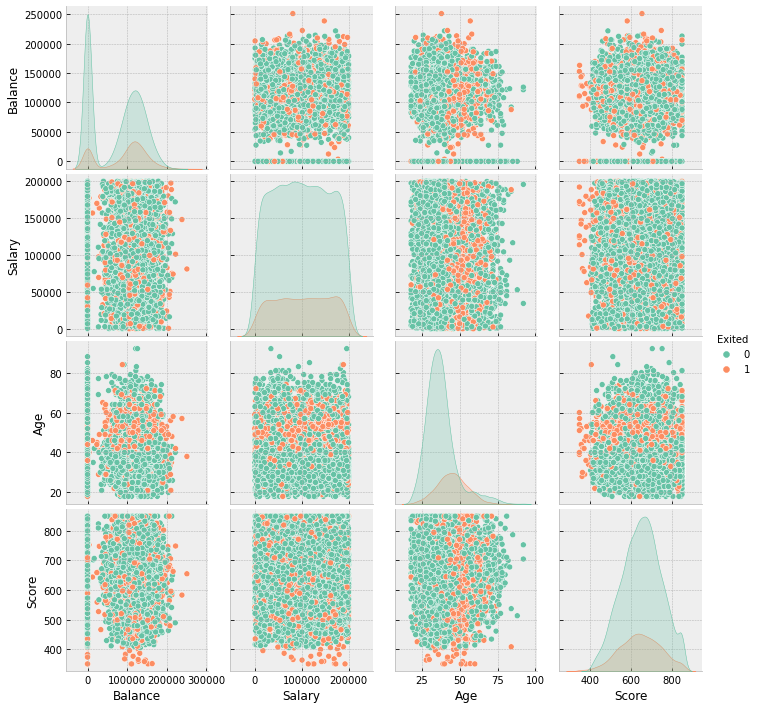

In [63]:
#Pairplot
sns.pairplot(data,hue = 'Exited'  , palette = 'Set2', vars = ['Balance', 'Salary','Age','Score']);

## Age

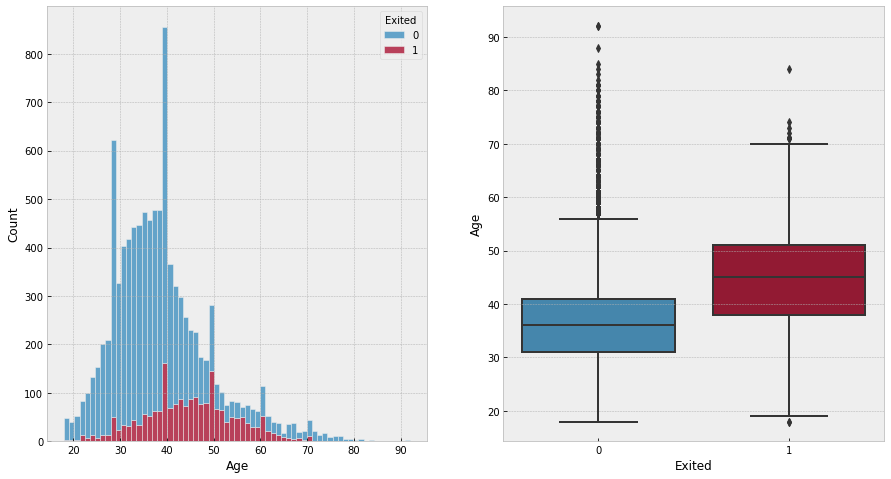

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8));
sns.histplot(ax=axes[0],data=data, x="Age", hue="Exited", multiple="stack");
sns.boxplot(ax=axes[1],x = 'Exited',y ='Age', data = data);


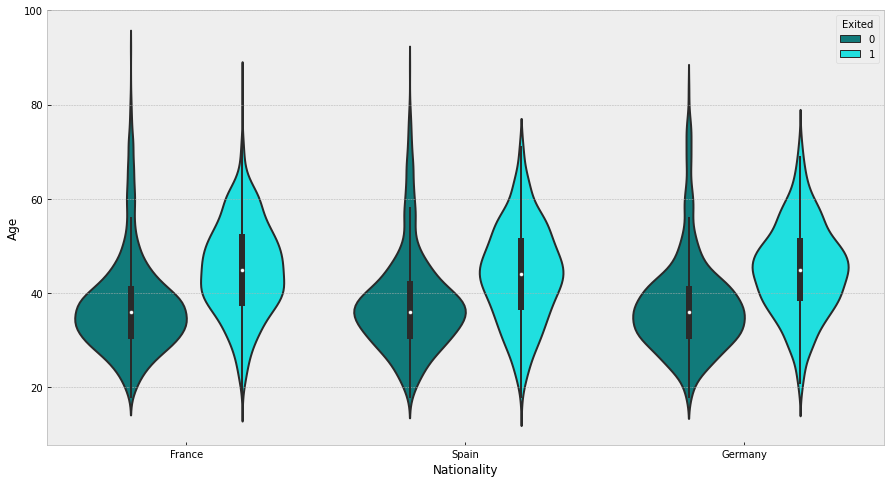

In [65]:
plt.rcParams['figure.figsize'] = (15, 8);
sns.violinplot(x='Nationality',y="Age", hue = 'Exited',data=data,palette=['#008B8B','#00FFFF']);

- Tanto lo que se muestra en el pairplot y en los últumos dos gráficos muestran que la mayor desercion se incrementa para aquellas personas con mas de 40 años.
- Se observa que en todos los paises el comportamiento es el mismo
- Parece que luego de los 50 años de edad la cantidad de personas que no desertan se mantiene, aunque hay que tener en cuanta que luego de los 60 años se consideran outliears.


## Salario y Balance

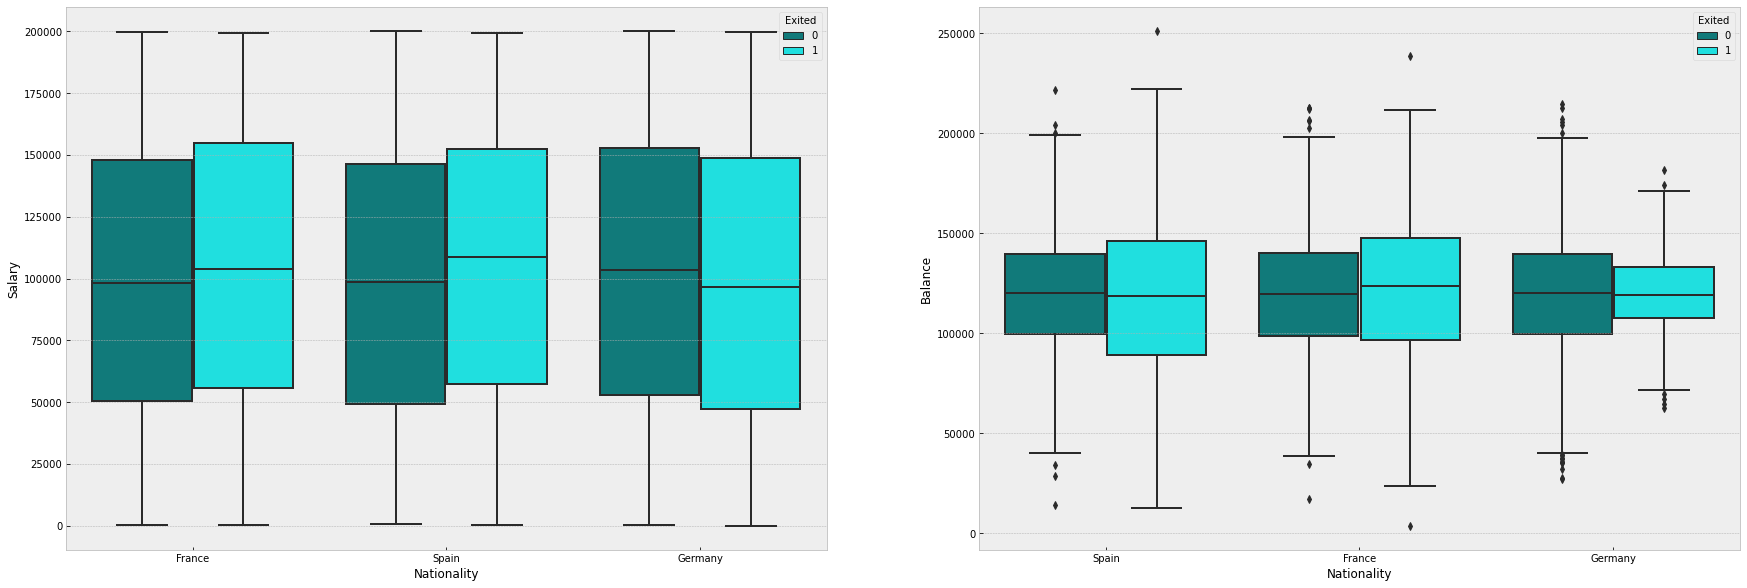

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10));

sns.boxplot(ax=axes[0],x='Nationality',y="Salary", hue = 'Exited',data=data,palette=['#008B8B','#00FFFF']);

## Se grafica sin los ceros en el balance, ya que en Alemania no hay balances en cero y sesga el análisis
sns.boxplot(ax=axes[1],x='Nationality',y="Balance", hue = 'Exited',data=data.loc[data['Balance'] != 0],palette=['#008B8B','#00FFFF']);

- No se puede concluir relación entre los balances y salarios y las nacionalidades.

## Score

<AxesSubplot:xlabel='Exited', ylabel='Score'>

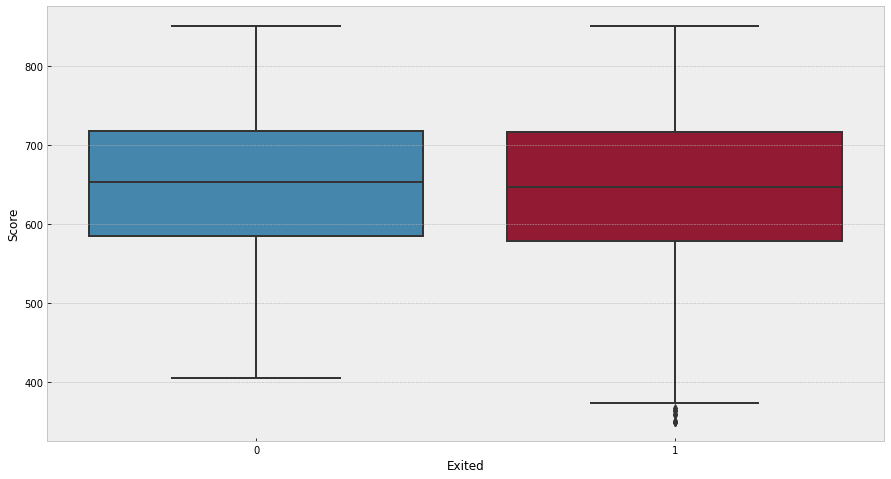

In [67]:
sns.boxplot(x = 'Exited',y ='Score', data = data)

<AxesSubplot:xlabel='Products', ylabel='Score'>

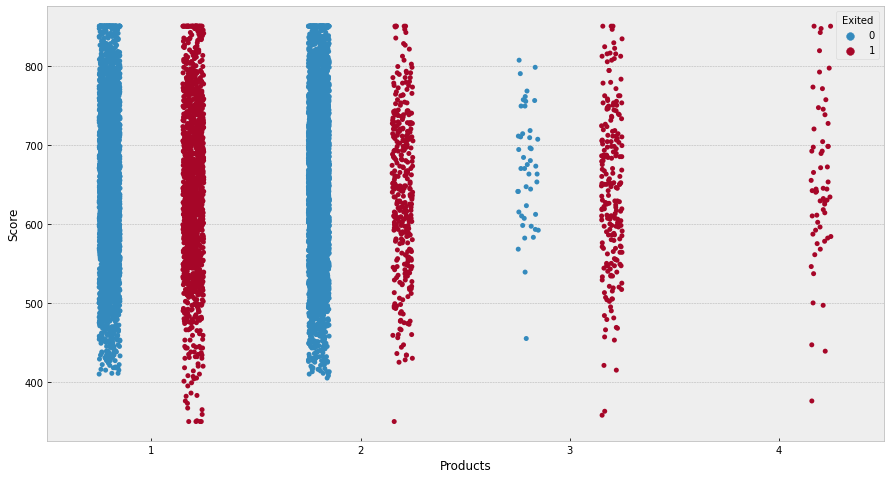

In [68]:
sns.stripplot(x="Products", y="Score", data=data, hue = 'Exited',dodge=True)

<AxesSubplot:xlabel='Nationality', ylabel='score_by_products'>

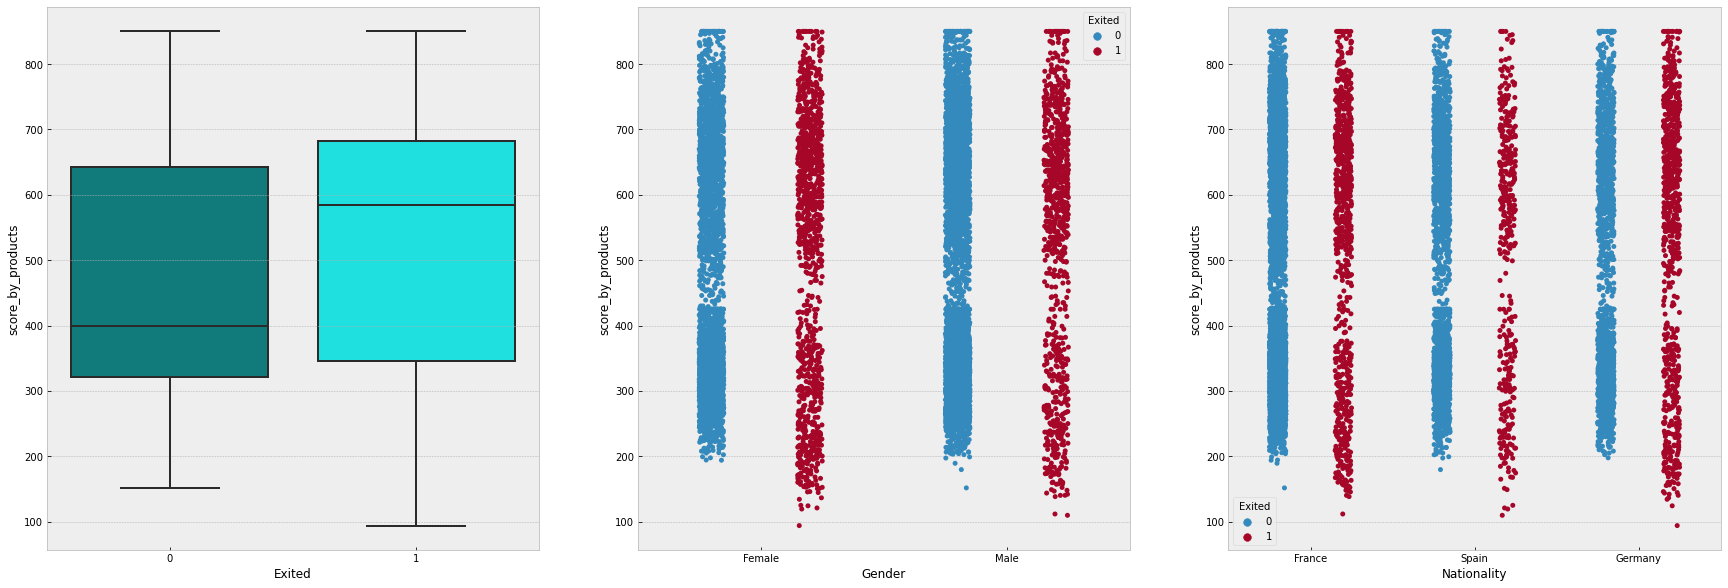

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

sns.boxplot(ax=axes[0], y="score_by_products", x = 'Exited',data=data,palette=['#008B8B','#00FFFF'])
sns.stripplot(ax=axes[1], x="Gender", y="score_by_products", data=data, hue = 'Exited',dodge=True)
sns.stripplot(ax=axes[2], x="Nationality", y="score_by_products", data=data, hue = 'Exited',dodge=True)


- Aquí observamos que efectivamente no hay relacion entre el score y exited
- Se observa que mientras mas productos fueron comprados mayor score se alcanzó
- Se observa que nadie que haya comprado 4 productos ha permanecido sin desertar
- Cuando se evalua el score por cantidad de productos comprados se ve que hay una franja entre los 400 y los 500 que tiene menos densidad de usuarios desertados


## Gender

<AxesSubplot:xlabel='Gender', ylabel='Age'>

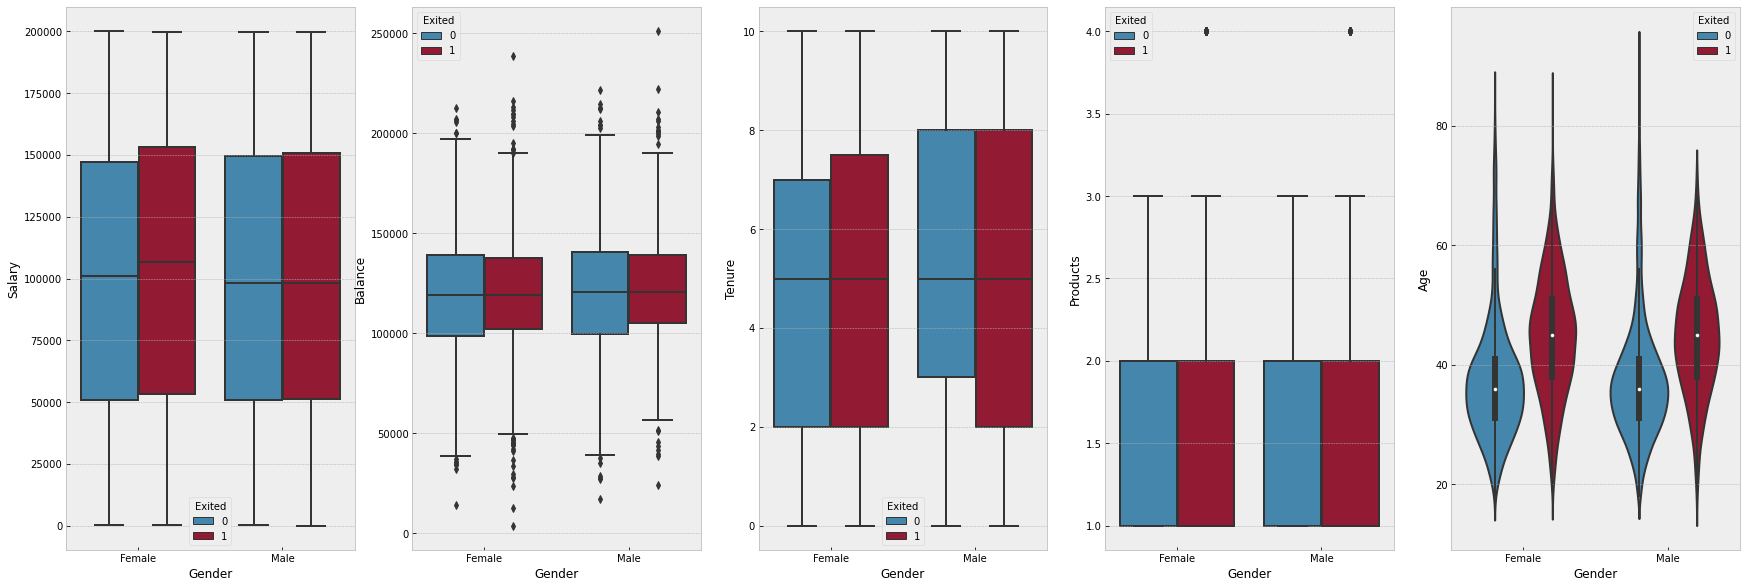

In [70]:
fig, axes = plt.subplots(1, 5, figsize=(30, 10))

sns.boxplot(ax=axes[0], data=data, y='Salary', x='Gender', hue = 'Exited')
sns.boxplot(ax=axes[1], data=data.loc[data['Balance'] != 0], y='Balance', x='Gender', hue = 'Exited')
sns.boxplot(ax=axes[2], data=data, y='Tenure', x='Gender', hue = 'Exited')
sns.boxplot(ax=axes[3], data=data, y='Products', x='Gender', hue = 'Exited')
sns.violinplot(ax=axes[4], data=data, y='Age', x='Gender', hue = 'Exited')


- A simple vista el genero es una variable categórica que no representa diferencias cuando se las compara con las otras varibales. Donde más diferencia se puede encontrar es con la variable Tenure

# Análisis multivariado por agrupaciones


In [71]:
#AQUI OBSERVAMOS QUE EFECTIVAMENTE EXISTEN DIFERENCIAS CUANDO HACEMOS
#EL ANALISIS CON NUESTRA VARIABLE TARGET
multi = data.groupby(['Active','Exited']).median()[['Age','Score']]
print(multi)


                Age  Score
Active Exited             
0      0       35.0  650.0
       1       45.0  648.0
1      0       37.0  656.0
       1       45.0  644.0


- Llegando a la conclusion que no dependera mucho si esta activo, pero si hay diferencias de edad cuando se mantiene o se retira. en este caso, el analisis se hizo con la mediana y no con el promedio porque con promedio obteniamos valores decimales para la edad y no corresponde 

                           Salary       Score
Exited Nationality                           
0      France        99217.097331  651.162226
       Germany      102414.657876  653.261357
       Spain         98602.369864  652.104167
1      France       103439.278296  641.914815
       Germany       98403.886450  647.689189
       Spain        103629.554818  647.484262


<AxesSubplot:xlabel='Exited,Nationality'>

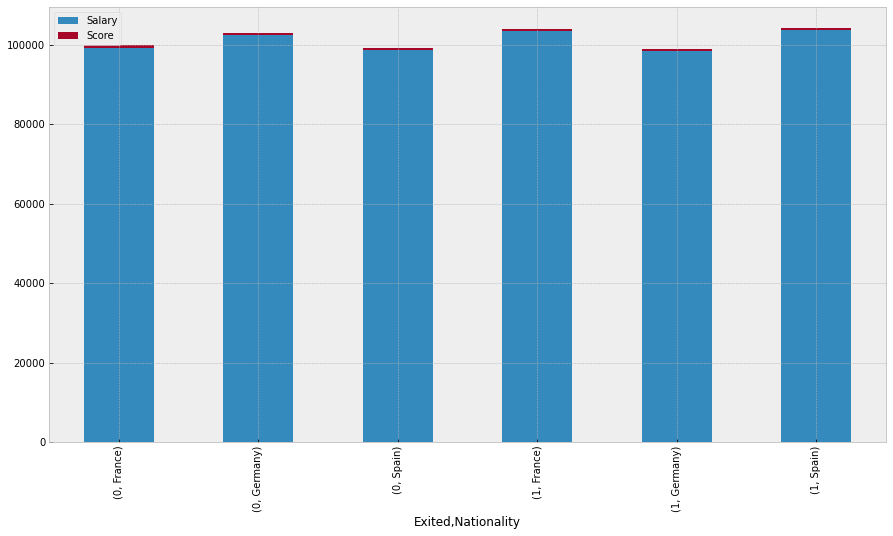

In [72]:
#ANALIZAMOS LA SIGUIENTE COMBINACION
multi = data.groupby(['Exited','Nationality']).mean()[['Salary','Score']]
print(multi)
multi.plot.bar(stacked=True)
 

- Las personas de alemania abandonan en promedio cuando cuentan con menor salario mientras que francia y espania sube su salario y ahi se produce el abandono, del score no hay mucho por decir



In [73]:
#ANALIZAMOS LA SIGUIENTE COMBINACION
multi = data.groupby(['Exited','Gender']).mean()[['Salary','Balance']]
multi


Salary       Balance
Exited Gender                             
0      Female   99816.071486  71183.249639
       Male     99680.391827  73911.607037
1      Female  102948.986093  89036.639359
       Male     99584.287272  93736.483742

- El género femenino con mejor salario y mejora cuando exited vale 
- El género masculino parece mantener su salario independiente del abandono.
- En cuanto al balance se observa que el genero masculino se mantiene por encima del femenino


<br/>
A continuación se analiza la mediana para obtener mas conclusiones:

                   Salary     Balance
Exited Gender                        
0      Female  101026.530   89967.165
       Male     98060.510   93911.300
1      Female  106663.460  108076.330
       Male     98083.205  111310.710


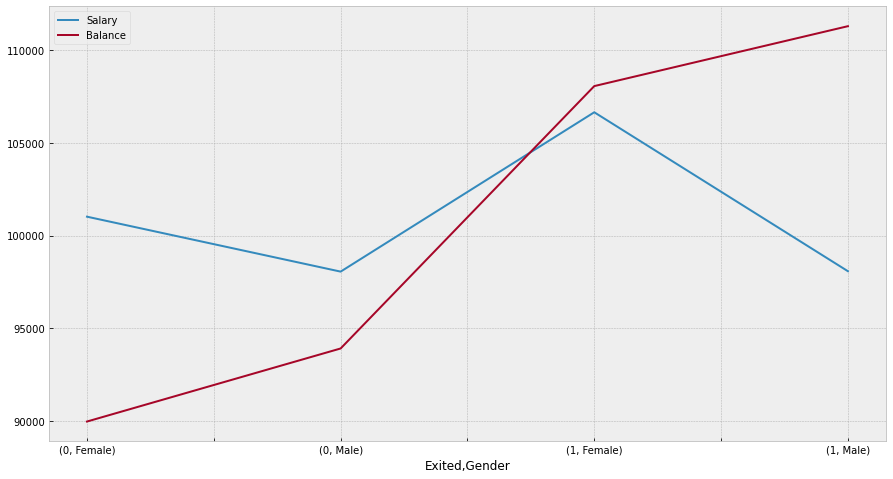

In [74]:
multi = data.groupby(['Exited','Gender']).median()[['Salary','Balance']]
print(multi)
multi.plot.line();

- Se observa que cuando exited es 0, las mujeres tienen mayor salario pero menor balance y en los hombres ocurre lo contrario es decir mayor balance pero menor salario. Cuando exited vale 1 las mujeres tienen un balance parecido a su salario y los hombres disminuyen su salario pero aumentan su balance.

# Conclusiones hasta el momento

Los cálculos de correlación muestran dependencias entre algunas varibles, pero no parecen dependencias razonables.
<br/><br/>

La variable Age es la que más peso parece tener a la hora de estimar una deserción. Por otro lado la cantidad de productos y el score_by_product tambien parecen ser varibles potenciales para realizar la predicción de deserción.

# Clasificación

In [75]:
data_clasifiacion = pd.get_dummies(data, columns=["Nationality", "Gender"])

In [76]:
X = data_clasifiacion.drop(["Exited","Nationality_Spain","Gender_Female"], axis=1) 
y = data_clasifiacion.Exited

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
X_train.head()

,Score,Age,Tenure,Balance,Products,Card,Active,Salary,score_by_products,Nationality_France,Nationality_Germany,Gender_Male
Row,,,,,,,,,,,,
9070,619,32,4,175406.13,2,1,1,172792.43,309.5,0,0,0
2604,643,34,7,160426.07,1,0,1,188533.11,643.0,0,1,0
7739,561,33,6,0.00,2,0,0,173680.39,280.5,1,0,1
1580,618,41,8,37702.79,1,1,1,195775.48,618.0,0,1,1
5059,714,37,9,148466.93,2,0,1,151280.96,357.0,1,0,1


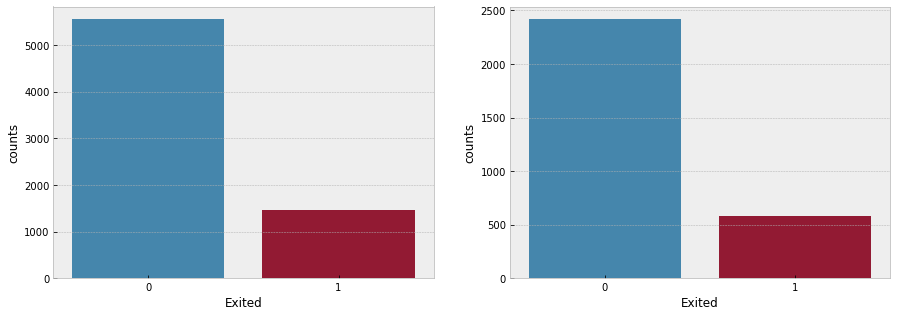

In [78]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(ax=axes[0],x = 'Exited', y = 'counts' ,data=y_train_df.groupby(['Exited']).size().reset_index(name='counts'));
sns.barplot(ax=axes[1],x = 'Exited', y = 'counts' ,data=y_test_df.groupby(['Exited']).size().reset_index(name='counts'));

Información del dataset:
Las clases del target son: Counter({0: 5547, 1: 1453})


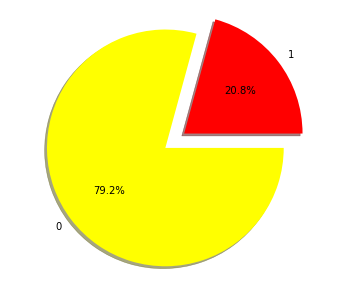

In [79]:
print('Información del dataset:'
      '\nLas clases del target son: {}'.format(Counter(y_train)))
plot_pie(y_train)

Información del dataset:
Las clases del target son: Counter({0: 2416, 1: 584})


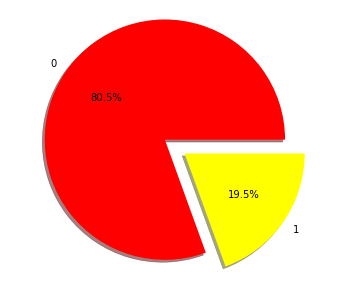

In [80]:
print('Información del dataset:'
      '\nLas clases del target son: {}'.format(Counter(y_test)))
plot_pie(y_test)

In [81]:
#CREAMOS DEL MODELO Y LO ENTRENAMOS 
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [82]:
#REALIZAMOS LA PREDICCION
y_train_pred = tree.predict(X_train) #prediccion con datos de entrenamiento
y_test_pred = tree.predict(X_test) #prediccion con datos de testeo

In [83]:
#CALCULAMOS LA PRESICION CON AMBOS DATOS
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de test:', test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8387142857142857
% de aciertos sobre el set de test: 0.846


De las 584 personas que si salieron, el modelo se equivoco 353 veces en predecir
De las 2416 personas que no salieron, el modelo se equivoco 109 veces en predecir

Predicted class     0    1
Actual class              
0                2307  109
1                 353  231



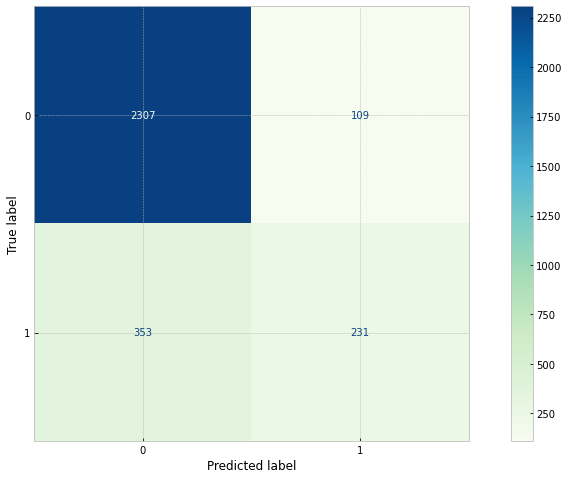

In [84]:
#MATRIZ DE CONFUSION
print('De las 584 personas que si salieron, el modelo se equivoco 353 veces en predecir')
print('De las 2416 personas que no salieron, el modelo se equivoco 109 veces en predecir')
print()
print(pd.crosstab(y_test, y_test_pred, rownames=['Actual class'], colnames=['Predicted class']))
print()
plot_confusion_matrix(tree, X_test, y_test, cmap = 'GnBu')  
plt.show();

- Hasta el momento podemos decir que nuestro modelo no es muy bueno para predecir
si una persona se retirara, en lugar de eso es bastante bueno prediciendo los que NO
se iran

Información del dataset con Random Under Sampling:
 y: Counter({0: 2037, 1: 2037})


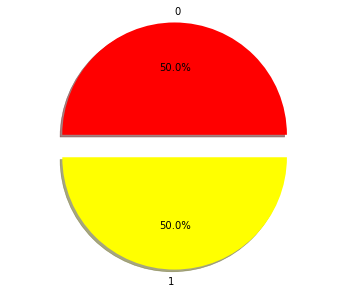

In [85]:
#VAMOS A BALANCEAR LA DATA Y VEREMOS SI EXISTE ALGUN CAMBIO
undersample = RandomUnderSampler(
    sampling_strategy ='not minority', random_state=0).fit(X_train, y_train)
X_train_us, y_train_us = undersample.fit_resample(X, y)
print('Información del dataset con Random Under Sampling:'
      '\n y: {}'.format(Counter(y_train_us)))
plot_pie(y_train_us)

In [86]:
#ENTRENAMOS NUEVAMENTE EL MODELO, CON LA DIFERENCIA QUE USAREMOS DATA BALANCEADA
tree.fit(X_train_us, y_train_us)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [87]:
#REALIZAMOS LA PREDICCION
y_train_pred = tree.predict(X_train) #prediccion con datos de entrenamiento
y_test_pred = tree.predict(X_test) #prediccion con datos de testeo

In [88]:
#CALCULAMOS LA PRESICION CON AMBOS DATOS
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de test:', test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7375714285714285
% de aciertos sobre el set de test: 0.7393333333333333


De las 584 personas que si salieron, el modelo se equivoco 181 veces en predecir
De las 2416 personas que no salieron, el modelo se equivoco 601 veces en predecir

Predicted class     0    1
Actual class              
0                1815  601
1                 181  403



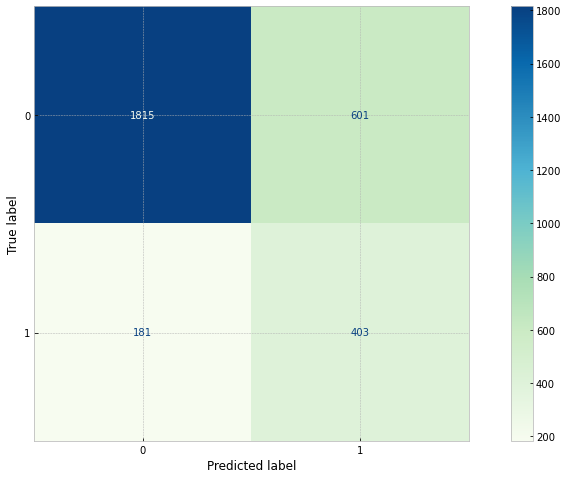

In [89]:
#MATRIZ DE CONFUSION
print('De las 584 personas que si salieron, el modelo se equivoco 181 veces en predecir')
print('De las 2416 personas que no salieron, el modelo se equivoco 601 veces en predecir')
print()
print(pd.crosstab(y_test, y_test_pred, rownames=['Actual class'], colnames=['Predicted class']))
print()
plot_confusion_matrix(tree, X_test, y_test, cmap = 'GnBu')  
plt.show();

- En este punto debemos tomar una desicion, ya que ahora el modelo se equivoca menos prediciendo que no se iran pero aumenta cosiderablemente el numero de errores en la situacion contraria.

# Hyperparametros

In [97]:
#USAREMOS DATA DESBALANCEADA
parameters = {'min_samples_split':np.arange(2, 30),'max_depth': np.arange(2,10), 'class_weight': [None, 'balanced'], 'random_state' : [42]}
esti = DecisionTreeClassifier()
grid = GridSearchCV(esti, parameters,scoring='accuracy', cv=5)
grid.fit(X_train,y_train)
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', grid.best_score_)

The parameters combination that would give best accuracy is : 
{'class_weight': None, 'max_depth': 7, 'min_samples_split': 16, 'random_state': 42}
The best accuracy achieved after parameter tuning via grid search is :  0.8508571428571429


In [98]:
#USAREMOS DATA DESBALANCEADA
parameters = {'min_samples_split':np.arange(2, 30),'max_depth': np.arange(2,10), 'class_weight': [None, 'balanced'], 'random_state' : [42]}
esti = DecisionTreeClassifier()
grid = GridSearchCV(esti, parameters,scoring='balanced_accuracy', cv=5)
grid.fit(X_train,y_train)
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)
print('The best acuracy achieved after parameter tuning via grid search is : ', grid.best_score_)

The parameters combination that would give best accuracy is : 
{'class_weight': 'balanced', 'max_depth': 6, 'min_samples_split': 24, 'random_state': 42}
The best acuracy achieved after parameter tuning via grid search is :  0.7564055198887359


In [99]:
#USAREMOS DATA DESBALANCEADA
parameters = {'min_samples_split':np.arange(2, 30),'max_depth': np.arange(2,10), 'class_weight': [None, 'balanced'], 'random_state' : [42]}
esti = DecisionTreeClassifier()
grid = GridSearchCV(esti, parameters,scoring='f1', cv=5)
grid.fit(X_train,y_train)
print('The parameters combination that would give best f1 is : ')
print(grid.best_params_)
print('The best f1 achieved after parameter tuning via grid search is : ', grid.best_score_)

The parameters combination that would give best f1 is : 
{'class_weight': None, 'max_depth': 7, 'min_samples_split': 18, 'random_state': 42}
The best f1 achieved after parameter tuning via grid search is :  0.5733331771298237


In [100]:
#ENTRENAMIENTO DE MODELO CON HYPERPARAMETROS
tree = DecisionTreeClassifier(max_depth=7,min_samples_split=16,random_state=42)
model = tree.fit(X_train, y_train)

In [101]:
#REALIZAMOS LAS PREDICCIONES
y_train_pred = model.predict(X_train) #prediccion con datos de entrenamiento
y_test_pred = model.predict(X_test) #prediccion con datos de testeo

In [102]:
#calculamos la presicion con datos y_test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de test:', test_accuracy)
print('% de aciertos antes de buscar los mejores parametros era de: 0.846')
print('La presicion mejoró')

% de aciertos sobre el set de test: 0.8596666666666667
% de aciertos antes de buscar los mejores parametros era de: 0.846
La presicion mejoró


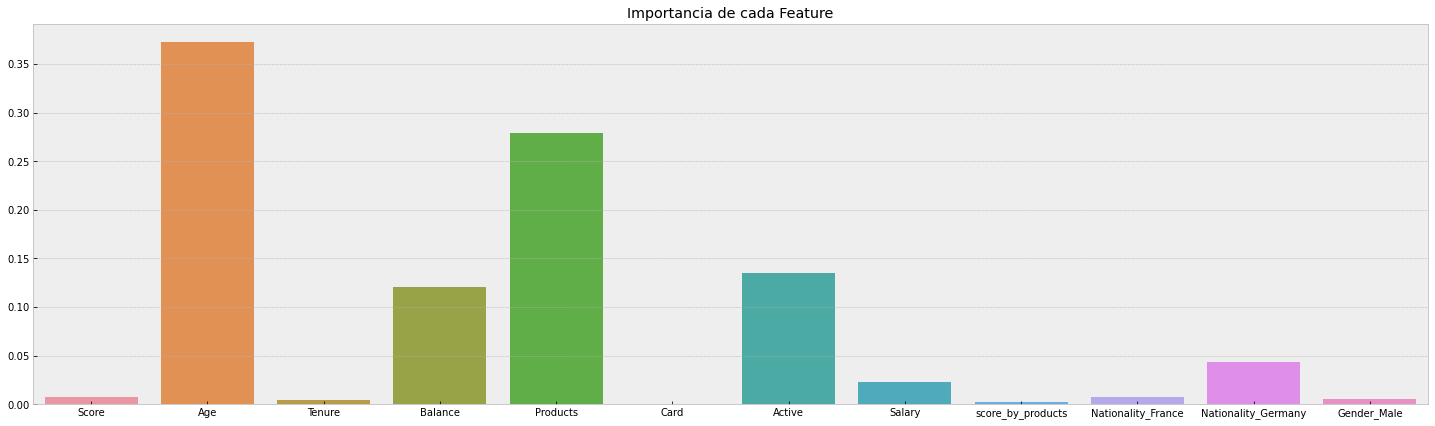

In [103]:
plt.figure(figsize=(25,7))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x = columns, y =importances)
plt.title('Importancia de cada Feature')
plt.show()

# Gradient Boosting

In [104]:
#BUSCAREMOS SUS HYPERPARAMETROS
parameters = {'learning_rate': [0.1, 1.5], 
              'n_estimators': [100, 200], 
              'subsample': np.arange(0.5, 1.0),
              'max_depth':np.arange(2,6), 
              'random_state' : [42]}

esti = GradientBoostingClassifier()
grid = GridSearchCV(esti, parameters,scoring='accuracy', cv=5)
grid.fit(X_train,y_train.values.ravel())
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', 
      grid.best_score_);


#The parameters combination that would give best accuracy is : 
#{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 140, 'random_state': 4, 'subsample': 0.8999999999999999}
#The best accuracy achieved after parameter tuning via grid search is :  0.864857142857143

The parameters combination that would give best accuracy is : 
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.5}
The best accuracy achieved after parameter tuning via grid search is :  0.8598571428571429


In [105]:
#BUSCAREMOS SUS HYPERPARAMETROS
parameters = {'learning_rate': [0.1, 1.5], 
              'n_estimators': [100, 200], 
              'subsample': np.arange(0.5, 1.0),
              'max_depth':np.arange(2,6), 
              'random_state' : [42]}

esti = GradientBoostingClassifier()
grid = GridSearchCV(esti, parameters,scoring='balanced_accuracy', cv=5)
grid.fit(X_train,y_train.values.ravel())
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', 
      grid.best_score_);

The parameters combination that would give best accuracy is : 
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.5}
The best accuracy achieved after parameter tuning via grid search is :  0.7234736355817437


In [106]:
cat = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,
                                 n_estimators=140, random_state=4,subsample=0.89)
model = cat.fit(X_train, y_train)

In [107]:
y_train_pred = model.predict(X_train) #prediccion con datos de entrenamiento
y_test_pred = model.predict(X_test) #prediccion con datos de testeo

In [108]:
#CALCULAMOS LA PRESICION CON DATOS DE TEST
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de test:', test_accuracy)
print('% de aciertos con el modelo DesicionTree mejorado fue de: 0.865')
print('La presicion mejoró con este nuevo modelo')

% de aciertos sobre el set de test: 0.8723333333333333
% de aciertos con el modelo DesicionTree mejorado fue de: 0.865
La presicion mejoró con este nuevo modelo


# KNN

In [109]:
#USAREMOS DATA DESBALANCEADA
parameters = {'n_neighbors':np.arange(2, 15),'leaf_size': np.arange(15,40), 'weights' :['uniform', 'distance']}
esti = KNeighborsClassifier()
grid = GridSearchCV(esti, parameters,scoring='accuracy', cv=5)
grid.fit(X_train,y_train)
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', grid.best_score_)

The parameters combination that would give best accuracy is : 
{'leaf_size': 15, 'n_neighbors': 14, 'weights': 'uniform'}
The best accuracy achieved after parameter tuning via grid search is :  0.7894285714285714


In [111]:
#USAREMOS DATA DESBALANCEADA
parameters = {'n_neighbors':np.arange(2, 15),'leaf_size': np.arange(15,40), 'weights' :['uniform', 'distance']}
esti = KNeighborsClassifier()
grid = GridSearchCV(esti, parameters,scoring='balanced_accuracy', cv=5)
grid.fit(X_train,y_train.values.ravel())
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', 
      grid.best_score_);

The parameters combination that would give best accuracy is : 
{'leaf_size': 15, 'n_neighbors': 4, 'weights': 'distance'}
The best accuracy achieved after parameter tuning via grid search is :  0.5280472143139932


# Análisis de los modelos

## Presición

In [112]:
#CALCULAREMOS EL RESTO DE METRICAS

models = []
models.append(DecisionTreeClassifier(class_weight= None,max_depth=7,min_samples_split=16,random_state=42))
models.append(GradientBoostingClassifier(learning_rate=0.1,max_depth=3,
                                 n_estimators=100, random_state=42,subsample=0.5))
models.append(KNeighborsClassifier(n_neighbors=14,leaf_size=15,
                                 weights= 'uniform'))

acuracy = []
auc= []
recall = []
prec = []
f1 = []

for m in models: 
    model = m.fit(X_train, y_train)
    ytest_pred = model.predict(X_test)
    acuracy.append(accuracy_score(y_test,ytest_pred))
    auc.append(roc_auc_score(y_test,ytest_pred))
    recall.append(recall_score(y_test,ytest_pred))
    prec.append(precision_score(y_test,ytest_pred))
    f1.append(f1_score(y_test,ytest_pred))

res_pres = pd.DataFrame({'Algoritmo': ['DecisionTree','GradientBoosting','KNeighborsClassifier'],
                    'Accuracy':acuracy,'roc_auc_score':auc,'Recall':recall,'Prec':prec,
                    'F1':f1})
                    
res_pres

,Algoritmo,Accuracy,roc_auc_score,Recall,Prec,F1
0,DecisionTree,0.859667,0.716162,0.481164,0.704261,0.571719
1,GradientBoosting,0.870000,0.721928,0.479452,0.765027,0.589474
2,KNeighborsClassifier,0.800000,0.501882,0.013699,0.250000,0.025974


- Para nuestro conjunto de datos,el modelo de clasificacion Gradient Boosting Classifier es ligeramente mejor que el algoritmo DecisionTree

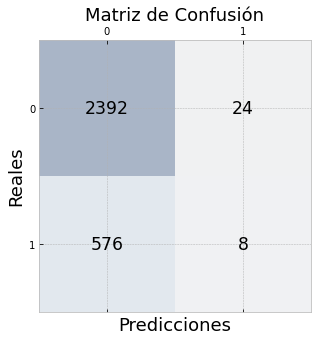

In [113]:
modelo_presicion = KNeighborsClassifier(n_neighbors=14,leaf_size=15,
                                 weights= 'uniform')
result = modelo_presicion.fit(X_train, y_train)

y_test_pred = result.predict(X_test)
    
matriz = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matriz, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matriz.shape[0]):
    for j in range(matriz.shape[1]):
        ax.text(x=j, y=i,s=matriz[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Reales', fontsize=18)
plt.title('Matriz de Confusión', fontsize=18)
plt.show()

## Presición balanceada

In [114]:
#CALCULAREMOS EL RESTO DE METRICAS
models = []
models.append(DecisionTreeClassifier(max_depth=6,min_samples_split=24,random_state=42,class_weight = 'balanced' ))
models.append(GradientBoostingClassifier(learning_rate= 0.1,max_depth=3,
                                 n_estimators=200, random_state=42,subsample=0.5))
models.append(KNeighborsClassifier(n_neighbors=4,leaf_size=15,
                                 weights='distance'))

acuracy = []
auc= []
recall = []
prec = []
f1 = []

for m in models: 
    model = m.fit(X_train, y_train)
    ytest_pred = model.predict(X_test)
    acuracy.append(accuracy_score(y_test,ytest_pred))
    auc.append(roc_auc_score(y_test,ytest_pred))
    recall.append(recall_score(y_test,ytest_pred))
    prec.append(precision_score(y_test,ytest_pred))
    f1.append(f1_score(y_test,ytest_pred))

res_rec = pd.DataFrame({'Algoritmo': ['DecisionTree','GradientBoosting','KNeighborsClassifier'],
                    'Accuracy':acuracy,'roc_auc_score':auc,'Recall':recall,'Prec':prec,
                    'F1':f1})
                    
res_rec

,Algoritmo,Accuracy,roc_auc_score,Recall,Prec,F1
0,DecisionTree,0.754667,0.760039,0.768836,0.427619,0.549572
1,GradientBoosting,0.872333,0.730518,0.498288,0.763780,0.603109
2,KNeighborsClassifier,0.745333,0.520528,0.152397,0.248603,0.188960


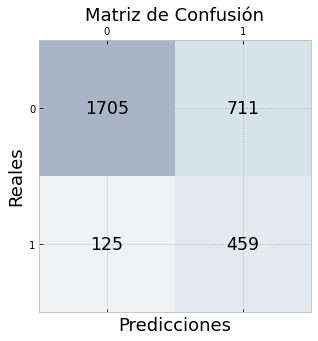

In [117]:
modelo_recall = DecisionTreeClassifier(max_depth=5,min_samples_split=24,random_state=42,class_weight = 'balanced' )
result = modelo_recall.fit(X_train, y_train)
y_test_pred = result.predict(X_test)
    
matriz = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matriz, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matriz.shape[0]):
    for j in range(matriz.shape[1]):
        ax.text(x=j, y=i,s=matriz[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Reales', fontsize=18)
plt.title('Matriz de Confusión', fontsize=18)
plt.show()

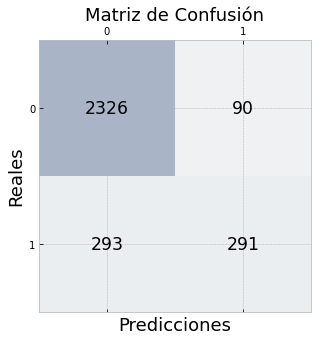

In [118]:
modelo_recall = GradientBoostingClassifier(learning_rate= 0.1,max_depth=3,
                                 n_estimators=200, random_state=42,subsample=0.5)
result = modelo_recall.fit(X_train, y_train)
y_test_pred = result.predict(X_test)
    
matriz = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matriz, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matriz.shape[0]):
    for j in range(matriz.shape[1]):
        ax.text(x=j, y=i,s=matriz[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Reales', fontsize=18)
plt.title('Matriz de Confusión', fontsize=18)
plt.show()

# Conclusiones

- Los dos modelos a analizar son arboles de desicion y gradient boosting ya que tienen el mayor valor de accuracy.
- El único modelo capaz de mejorar el recall fue el árbol de desiciones.
- Por un lado , al maximizar la presición se pierde la capacidad de clasificar correctamente a quienes se van de la plataforma. Por el otro lado, al maximizar el recall se consigue mejorar la predicción  de clientes que se retiran de la plataforma, pero se sobredimensiona dichas predeicciones.
- Optar por el modelo que maximiza el una presicion balanceada genera un costo de acciones de marketing, pero puede generar ,que gracias a las predicciones correctas, aumentar las ventas de la plataforma disminuyendo el recall.

  